# Practice Session 08: Data streams

In this session we will take a large corpus of documents and compute some statistics using data streams methods.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

Author: <font color="blue">Marcel Fernández</font>

E-mail: <font color="blue">marcel.fernandez02@estudiant.upf.edu</font>

Date: <font color="blue">20/11/2023</font>

In [2]:
import io
import nltk
import gzip
import random
import statistics
import secrets
import re
import gzip


# 0. Dataset and how to iterate

In [3]:
# Leave this code as-is

INPUT_FILE = "movie_lines.tsv.gz"

In [4]:
# Leave this code as-is

# Producer in Python that reads a filename by words
def read_by_words(filename, max_words=-1, report_every=-1):
    
    # Open the input file
    with gzip.open(INPUT_FILE, "rt", encoding='utf8') as file:
        
        # Initialize counter of words to stop at max_words
        counter = 0
    
        # Regular expression to identify words having 3 letters or more and beginning with a-z
        word_expr = re.compile('^[a-z]{2,}$', re.IGNORECASE)

        # Iterate through lines in the file
        for line in file:
            
            elements = line.split("\t")
            
            text = ""
            if len(elements) >= 5:
                text = elements[4].strip()
                                        
            if counter > max_words and max_words != -1:
                break
                
            for word in nltk.word_tokenize(text):
                          
                if word_expr.match(word):
                    counter += 1
                    
                    # Report
                    if (report_every != -1) and (counter % report_every == 0):
                        if max_words == -1:
                            print("- Read %d words so far" % (counter))
                        else:
                            print("- Read %d/%d words so far" % (counter, max_words))

                    # Produce the word in lowercase
                    yield word.lower()

In [5]:
# Leave this code as-is

# Iterate through the file
for word in read_by_words(INPUT_FILE, max_words=400000, report_every=500000): # I choose 1 milion words
    # Prints 1/10000 of words
    if random.random() < 0.0001:
        print("Current word '%s'" % (word)) 

Current word 'but'
Current word 'bad'
Current word 'you'
Current word 'car'
Current word 'wong'
Current word 'eye'
Current word 'knowing'
Current word 'okay'
Current word 'awake'
Current word 'was'
Current word 'little'
Current word 'final'
Current word 'commes'
Current word 'have'
Current word 'know'
Current word 'you'
Current word 'up'
Current word 'and'
Current word 'no'
Current word 'you'
Current word 'was'
Current word 'do'
Current word 'deal'
Current word 'is'
Current word 'cab'
Current word 'you'
Current word 'bail'
Current word 'when'
Current word 'it'
Current word 'do'
Current word 'me'
Current word 'god'
Current word 'passage'
Current word 'what'
Current word 'with'
Current word 'allergist'
Current word 'is'
Current word 'of'
Current word 'strong'
Current word 'the'
Current word 'ridiculous'
Current word 'little'
Current word 'to'
Current word 'not'
Current word 'not'
Current word 'ghastly'


In [6]:
# Run this if above gives an error about 'punkt'
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# 1. Determine approximately the top-10 words

<font size="+1" color="red">Replace this cell with your code for "add_reservoir"</font>

In [8]:
# reservoir size S 
# ignore with prob (1 - s / N)


def add_to_reservoir(reservoir, item, max_reservoir_size):
    assert len(reservoir) <= max_reservoir_size

    if len(reservoir) < max_reservoir_size:
        reservoir.append(item)
    else:
        prob = max_reservoir_size / (len(reservoir) + 1)
        random_value = random.random() # generem un valor entre 0 i 1, comparem probabilitats
        if random_value < prob:
            
            ignore_value = random.randint(0, max_reservoir_size - 1)
            reservoir[ignore_value] = item
            
    return reservoir
            

In [9]:
# Test to check if the function goes well
max_size = 10
reservoir = []
for i in range(1, 101):  
    add_to_reservoir(reservoir, i, max_size)

print("Final Reservoir:", reservoir)

Final Reservoir: [90, 78, 99, 74, 89, 80, 100, 98, 81, 95]


In [10]:
def reservoir_sampling(filename, reservoir_size, max_words=-1, report_every=-1):
    reservoir = []
    words_read = 0

    for word in read_by_words(filename, max_words=max_words, report_every=report_every):
        words_read += 1
        add_to_reservoir(reservoir, word, reservoir_size)

    return words_read, reservoir

<font size="+1" color="red">Replace this cell with your code for "reservoir_sampling"</font>

In [11]:
# Leave this code as-is

reservoir_size = 1500
(items_seen, reservoir) = reservoir_sampling(INPUT_FILE, reservoir_size, max_words=1000000, report_every=100000)

print("Number of items seen    : %d" % items_seen)
print("Number of items sampled : %d" % len(reservoir) )

- Read 100000/1000000 words so far
- Read 200000/1000000 words so far
- Read 300000/1000000 words so far
- Read 400000/1000000 words so far
- Read 500000/1000000 words so far
- Read 600000/1000000 words so far
- Read 700000/1000000 words so far
- Read 800000/1000000 words so far
- Read 900000/1000000 words so far
- Read 1000000/1000000 words so far
Number of items seen    : 1000023
Number of items sampled : 1500


In [12]:
# Leave this code as-is

freq = {}
for item in reservoir:
    freq[item] = reservoir.count(item)

most_frequent_items = sorted([(frequency, word) for word, frequency in freq.items()], reverse=True)[:10]
for absolute_frequency, word in most_frequent_items:
    print("%d %s" % (absolute_frequency, word))

61 you
49 to
46 it
36 the
26 and
22 that
21 me
18 what
18 of
18 in


<font size="+1" color="red">Replace this cell with your code to print the top items and their relative frequencies</font>

In [20]:
from collections import Counter

def compute_top_frequencies(reservoir, top):
    # Count the occurrences of each item in the reservoir
    item_counts = Counter(reservoir)
 
    sorted_items = sorted(item_counts.items(), key=lambda x: x[1], reverse=True)
    top_15_items = sorted_items[:top]

    # Calculate relative frequencies as percentages
    total_items = len(reservoir)
    relative_frequencies = [(item, count / total_items * 100) for item, count in top_15_items]

    return relative_frequencies

In [21]:
top_frequencies = compute_top_frequencies(reservoir,15)

print("Top 15 most frequent items and their relative frequencies:")
print('--'*30)
for item, frequency in top_frequencies:
    print(f"{item}: {frequency:.2f}%")

Top 15 most frequent items and their relative frequencies:
------------------------------------------------------------
you: 6.00%
the: 5.00%
she: 4.00%
to: 3.00%
never: 3.00%
why: 2.00%
be: 2.00%
me: 2.00%
go: 2.00%
they: 2.00%
it: 2.00%
them: 2.00%
how: 2.00%
other: 1.00%
see: 1.00%


<font size="+1" color="red">Increase the max limit of words so that one pass takes no more than 5 minutes to be completed. Replace this cell with your code to try different reservoir sizes. In each case, print your estimate for the relative and absolute frequency of the words in the entire dataset.</font>

In [18]:
reservoir_size = 100
(items_seen, reservoir_2milion) = reservoir_sampling(INPUT_FILE, reservoir_size, max_words=2000000, report_every=500000)

print("Number of items seen    : %d" % items_seen)
print("Number of items sampled : %d" % len(reservoir_2milion) )

- Read 500000/2000000 words so far
- Read 1000000/2000000 words so far
- Read 1500000/2000000 words so far
- Read 2000000/2000000 words so far
Number of items seen    : 2000007
Number of items sampled : 100


In [22]:
top_frequencies = compute_top_frequencies(reservoir_2milion, 5)

print("Top 5 most frequent items and their relative frequencies:")
print('--'*30)
for item, frequency in top_frequencies:
    print(f"{item}: {frequency:.2f}%")

Top 5 most frequent items and their relative frequencies:
------------------------------------------------------------
you: 5.00%
to: 5.00%
the: 4.00%
she: 3.00%
they: 3.00%


<font size="+1" color="red">Remove the max limit of words and re-run. Replace this cell with a brief commentary indicating what reservoir size you would recommend to use, and your overall conclusions.</font>

In [23]:
reservoir_size = 300
(items_seen, reservoir_max_len) = reservoir_sampling(INPUT_FILE, reservoir_size, max_words=3500000, report_every=500000)

print("Number of items seen    : %d" % items_seen)
print("Number of items sampled : %d" % len(reservoir_max_len) )

- Read 500000/3500000 words so far
- Read 1000000/3500000 words so far
- Read 1500000/3500000 words so far
- Read 2000000/3500000 words so far
- Read 2500000/3500000 words so far
Number of items seen    : 2944845
Number of items sampled : 300


In [24]:
top_frequencies = compute_top_frequencies(reservoir_max_len, 5)

print("Top 5 most frequent items and their relative frequencies:")
print('--'*30)
for item, frequency in top_frequencies:
    print(f"{item}: {frequency:.2f}%")

Top 5 most frequent items and their relative frequencies:
------------------------------------------------------------
the: 4.00%
to: 3.33%
you: 3.00%
your: 2.00%
of: 1.67%



Looking at the results of the tests with different reservoir sizes, we can make some observations and comments:

> - **Reservoir Size = 1500** (1 million words):
The relative frequency of words seems to be well distributed.
The reservoir size being 1.5% of the total number of words appears to be quite effective in capturing a representative sample.

> - **Reservoir Size = 100** (2 million words):
Although the reservoir size is smaller in relation to the dataset, we still obtain a reasonably representative sample of words.
The relative frequency of words tends to be more uniform due to a smaller sample size.

> - **Reservoir Size = 300** (3 million words):
With a larger reservoir size, variability in relative frequencies decreases, and more common words stand out more clearly.
The reservoir size is still relatively small compared to the total dataset size.

> - **General Comments:**
The choice of reservoir size depends on your specific goals and constraints.
A larger reservoir size tends to provide a more accurate representation of relative frequencies but may require more resources.
A smaller reservoir size may be sufficient to get a general overview, especially when resources are limited, but there may be more variability in the results.

> - **Recommendation**:
Since a reservoir size of 1500 seems to provide a good representation of relative frequencies and is still manageable in terms of resources, it could be a reasonable choice for a balance between accuracy and efficiency. However, the final choice will depend on your specific goals and resource constraints in your particular application. Experimenting with additional reservoir sizes and evaluating how they affect accuracy and efficiency could be beneficial for making a more informed decision.

Using this data set we can see that with relatively small values of the reservoir size the program takes relatively little time, so we could increase the size further and thus have more precision in the data.

# 2. Determine approximately the distinct number of words

In [28]:
# Leave this code as-is

def count_trailing_zeroes(number):
    count = 0
    while number & 1 == 0:
        count += 1
        number = number >> 1
    return count

In [29]:
# Leave this code as-is

def random_hash_function():
    # We use a cryptographically safe generator for the salt of our hash function
    salt = secrets.token_bytes(32)
    return lambda string: hash(string + str(salt))

In [31]:
number_of_passes = 5
estimates = []

for i in range(number_of_passes):
    hashing = random_hash_function()
    R = 0
    for word in read_by_words(INPUT_FILE, max_words=1000000, report_every=500000):
        hash_value = hashing(word)
        n_zeros = count_trailing_zeroes(hash_value)
        R = max(R, n_zeros)
        
    estimate = 2**R
    estimates.append(estimate)
    print("Estimate on pass %d: %d distinct words" % (i+1, estimate))

- Read 500000/1000000 words so far
- Read 1000000/1000000 words so far
Estimate on pass 1: 16384 distinct words
- Read 500000/1000000 words so far
- Read 1000000/1000000 words so far
Estimate on pass 2: 32768 distinct words
- Read 500000/1000000 words so far
- Read 1000000/1000000 words so far
Estimate on pass 3: 32768 distinct words
- Read 500000/1000000 words so far
- Read 1000000/1000000 words so far
Estimate on pass 4: 16384 distinct words
- Read 500000/1000000 words so far
- Read 1000000/1000000 words so far
Estimate on pass 5: 131072 distinct words


<font size="+1" color="red">Replace this cell with your code to perform the requested number of passes.</font>

In [32]:
# Leave this code as-is

print("* Average of estimates: %.1f" % statistics.mean(estimates))
print("* Median  of estimates: %.1f" % statistics.median(estimates))

* Average of estimates: 45875.2
* Median  of estimates: 32768.0


<font size="+1" color="red">Remove the limit of max words, or set to a high number, but notice that you do no need to use more than one hour of computer processing time, and perform the 10 passes. Replace this cell with the results you obtained in each pass, and whether the average or the median seem more appropriate for this probabilistic counting.</font>

In [33]:
number_of_passes = 10
estimates = []

for i in range(number_of_passes):
    hashing = random_hash_function()
    R = 0
    for word in read_by_words(INPUT_FILE): # We delete the max words to take all the dataset
        hash_value = hashing(word)
        n_zeros = count_trailing_zeroes(hash_value)
        R = max(R, n_zeros)
        
    estimate = 2**R
    estimates.append(estimate)
    print("Estimate on pass %d: %d distinct words" % (i+1, estimate))

Estimate on pass 1: 65536 distinct words
Estimate on pass 2: 16384 distinct words
Estimate on pass 3: 131072 distinct words
Estimate on pass 4: 131072 distinct words
Estimate on pass 5: 32768 distinct words
Estimate on pass 6: 65536 distinct words
Estimate on pass 7: 131072 distinct words
Estimate on pass 8: 131072 distinct words
Estimate on pass 9: 32768 distinct words
Estimate on pass 10: 262144 distinct words


In [34]:
print("* Average of estimates: %.1f" % statistics.mean(estimates))
print("* Median  of estimates: %.1f" % statistics.median(estimates))

* Average of estimates: 99942.4
* Median  of estimates: 98304.0


> - Comments:

 The estimates vary significantly from one pass to another, reflecting the probabilistic nature of the Flajolet-Martin algorithm.
Larger estimates in certain passes indicate higher variability and uncertainty in those particular runs.
The average of estimates (99942.4) is influenced by the large estimates in some passes, making it less robust to outliers.
The median of estimates (98304.0) may be more appropriate for this probabilistic counting as it is less sensitive to extreme values.
> - Recommendation:

Given the variability in the estimates, the median is a more robust measure of central tendency in this context.
The median provides a better representation of the typical estimate and is less affected by outliers.
Considering the nature of probabilistic counting, where individual estimates can vary widely, using the median as a summary statistic is likely a more reliable choice.

### EXTRA

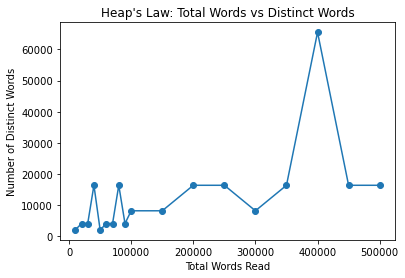

In [37]:
import secrets
import statistics
import matplotlib.pyplot as plt

def count_trailing_zeroes(number):
    count = 0
    while number & 1 == 0:
        count += 1
        number = number >> 1
    return count

def random_hash_function():
    # We use a cryptographically safe generator for the salt of our hash function
    salt = secrets.token_bytes(32)
    return lambda string: hash(string + str(salt))

def probabilistic_counting_experiment(max_words, number_of_passes=5):
    estimates = []

    for i in range(number_of_passes):
        hashing = random_hash_function()
        R = 0
        distinct_words = set()

        for word in read_by_words(INPUT_FILE, max_words=max_words):
            hash_value = hashing(word)
            n_zeros = count_trailing_zeroes(hash_value)
            R = max(R, n_zeros)

        estimate = 2**R
        estimates.append(estimate)

    return statistics.median(estimates)

def plot_heap_law(max_words_range):
    total_words_read = []
    distinct_words_count = []

    for max_words in max_words_range:
        median_estimate = probabilistic_counting_experiment(max_words)
        total_words_read.append(max_words)
        distinct_words_count.append(median_estimate)

    # Plotting Heap's Law
    plt.plot(total_words_read, distinct_words_count, marker='o')
    plt.title("Heap's Law: Total Words vs Distinct Words")
    plt.xlabel("Total Words Read")
    plt.ylabel("Number of Distinct Words")
    plt.show()


# Example usage:
max_words_range = [10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000,
                   150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000]
plot_heap_law(max_words_range)

> Observing the generated plot, it's important to note that due to the probabilistic nature of counting and the memory limitations introduced by the probabilistic counting method, irregularities in the plot are expected. Heap's Law describes the relationship between the size of the vocabulary and the size of the corpus, but the introduction of inherent noise from probabilistic counting can lead to variations in the estimation.

> The fluctuations and irregularities in the plot are anticipated and reflect the stochastic nature of estimations based on this approach. Additionally, factors such as the choice of random hash functions and the dataset size can also contribute to the observed variability.

> Despite these irregularities, the general pattern of the plot should still follow the expected trend of Heap's Law, showing an increase in the number of distinct words as the total dataset size increases. The key is to interpret the plot with an understanding that the estimations are approximate and subject to variations due to the probabilistic nature of the counting method.







<font size="+2" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>